## 1. Import necessary libraries

In [6]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## 2. Import Dataset

In [8]:
cancer_data = load_breast_cancer()

In [10]:
cancer_data_df = pd.DataFrame(data = cancer_data.data,columns=cancer_data.feature_names)
cancer_data_df['Target'] = cancer_data.target
cancer_data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 3. Data Understanding

In [11]:
cancer_data_df.shape

(569, 31)

In [12]:
cancer_data_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

In [13]:
cancer_data_df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

## Correaltion Analysis

In [14]:
cancer_data_df.corr().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
mean radius,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01,-0.73
mean texture,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12,-0.42
mean perimeter,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05,-0.74
mean area,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00,-0.71
mean smoothness,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,...,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50,-0.36
mean compactness,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,...,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69,-0.60
mean concavity,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,...,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51,-0.70
mean concave points,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,...,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37,-0.78
mean symmetry,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,...,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44,-0.33
mean fractal dimension,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,...,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77,0.01


## 4. Model Buiding

In [16]:
x = cancer_data_df.drop('Target', axis = 1)
y = cancer_data_df[['Target']]

In [17]:
x.shape, y.shape

((569, 30), (569, 1))

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=19,stratify=y)

In [20]:
x_train.shape, y_train.shape

((455, 30), (455, 1))

In [21]:
x_test.shape, y_test.shape

((114, 30), (114, 1))

## 5. Model Training

In [23]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4, random_state=15)

In [24]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=15)

## 6. Model Testing || 7. Model Evaluation

### Train Data

In [25]:
y_predict_train = dt_model.predict(x_train)
accuracy_score(y_train,y_predict_train)

0.989010989010989

### Test Data

In [26]:
y_predict_test = dt_model.predict(x_test)
accuracy_score(y_test,y_predict_test)

0.9473684210526315

## Apply PCA

## Data Preprocessing Before applying PCA

In [27]:
from sklearn.preprocessing import MinMaxScaler
min_max  = MinMaxScaler()
scaled_X = min_max.fit_transform(x)
scaled_X = pd.DataFrame(scaled_X,columns=cancer_data.feature_names)
scaled_X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(scaled_X)
X_pca = pd.DataFrame(X_pca,columns = ['PC1','PC2','PC3'])
X_pca

,PC1,PC2,PC3
0,1.387021,0.426895,-0.541706
1,0.462308,-0.556947,-0.205176
2,0.954621,-0.109701,-0.147849
3,1.000816,1.525089,-0.053271
4,0.626828,-0.302471,-0.409337
...,...,...,...
564,1.002840,-0.474785,-0.100042
565,0.620757,-0.517200,0.400361
566,0.226311,-0.287946,0.315225
567,1.677834,0.335946,0.296116


In [29]:
pca.explained_variance_ratio_

array([0.53097689, 0.1728349 , 0.07114442])

## 5. Model Training

In [30]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=15)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=15)

## 6. Model Testing || 7. Model Evaluation

## Train Data

In [31]:
y_pred_train = dt_model.predict(x_train)
accuracy_score(y_train,y_pred_train)

0.989010989010989

## Test Data

In [32]:
y_pred_test = dt_model.predict(x_test)
accuracy_score(y_test,y_pred_test)

0.9473684210526315

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not      Target
0         0
1         0
2         0
3         0
4         0
..      ...
564       0
565       0
566       0
567       0
568       1

[569 rows x 1 columns]

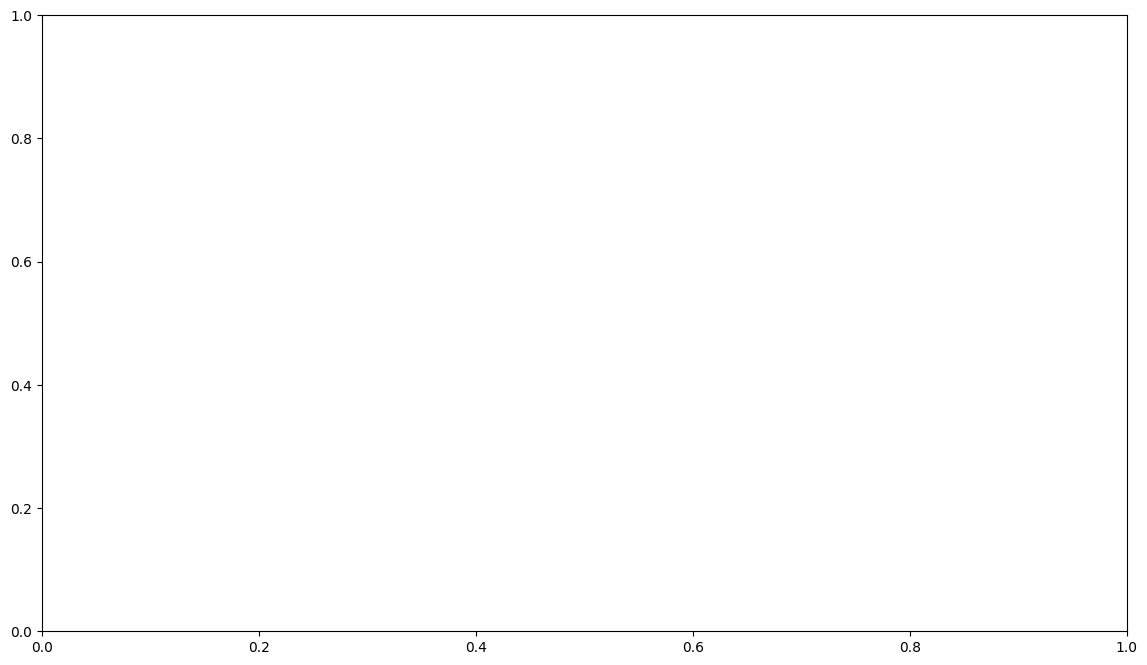

In [38]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,8))
plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c=y, cmap='viridis')
plt.title('Principal Components For Visualizing Benign and Malignant Tumors in 2D plot',size = 15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()